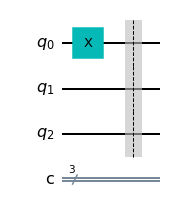

In [23]:
from qiskit import *
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

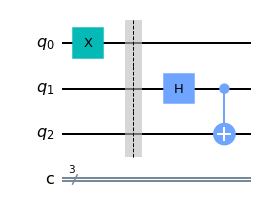

In [24]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

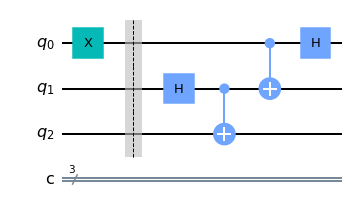

In [25]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

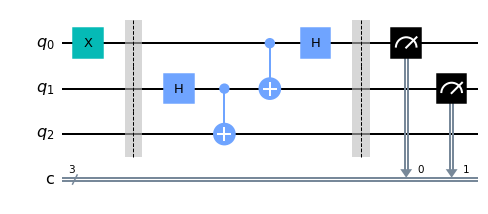

In [26]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

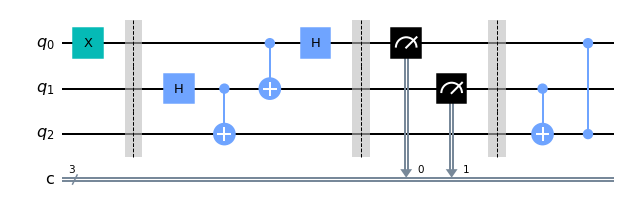

In [27]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

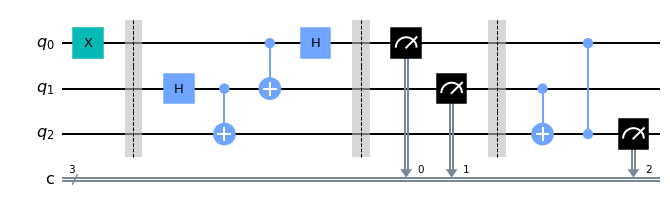

In [28]:
circuit.measure(2,2)
%matplotlib inline
circuit.draw(output='mpl')

{'100': 263, '101': 240, '110': 252, '111': 269}


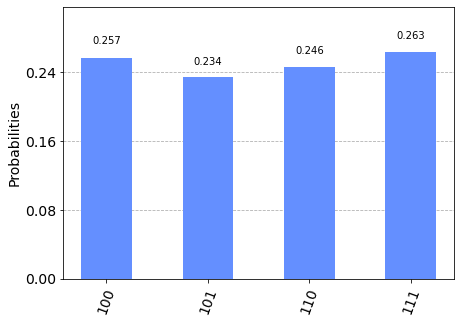

In [29]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts=result.get_counts()
print(counts)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

[0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 1.-1.2246468e-16j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j]


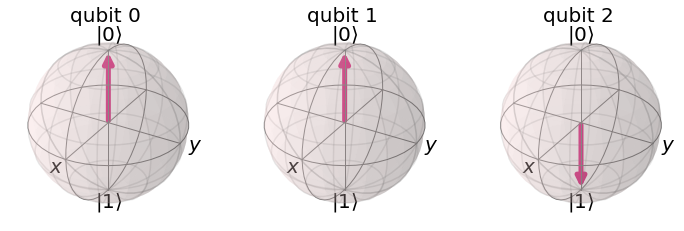

In [36]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector= result.get_statevector()
print(statevector)
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

In [14]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [16]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [17]:
qcomp = provider.get_backend('ibmq_bogota')

In [18]:
job = execute(circuit, backend=qcomp)

In [19]:
from qiskit.tools.monitor import job_monitor

In [20]:
job_monitor(job)

Job Status: job has successfully run


In [21]:
result = job.result()

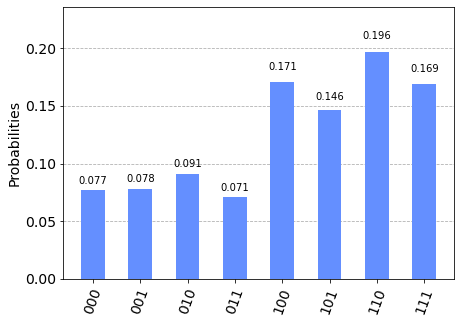

In [22]:
plot_histogram(result.get_counts(circuit))